In [2]:
import pandas as pd
import supabase

In [ ]:
from supabase import create_client, Client
import asyncio
from itertools import islice
import pandas as pd

key = ""

# Initialize the client
async def create_supabase_connection():
    supabase: Client = create_client("", key)
    print("Supabase connection created: ", supabase)
    return supabase

In [4]:
supabase_client = await create_supabase_connection()

Supabase connection created:  <supabase._sync.client.SyncClient object at 0x1041777c0>


In [5]:
async def fetch_all_data_from_table(supabase_client, table_name):
    """
    Fetch all data from a specified table in Supabase.
    
    Parameters:
    -----------
    supabase_client : Client
        An initialized Supabase client object
    table_name : str
        The name of the table to fetch data from
        
    Returns:
    --------
    dict
        A dictionary containing all the data from the table
    
    Raises:
    -------
    Exception
        If there is an error in fetching the data
    """
    try:
        # Query the table to get all rows
        response = supabase_client.table(table_name).select('*').execute()
        
        # Extract the data from the response
        data = response.data
        
        print(f"Successfully fetched {len(data)} rows from table '{table_name}'")
        return data
    
    except Exception as e:
        print(f"Error fetching data from table '{table_name}': {str(e)}")
        raise

In [6]:
df = await fetch_all_data_from_table(supabase_client,"inference_time")
df = pd.DataFrame(df)

Successfully fetched 29 rows from table 'inference_time'


In [7]:
df

,id,image_name,BakLLaVA_7B,Reasoning_DeepSeek_R1_Abliterated_Gemma3_12B,Reasoning_DeepSeek_R1_Abliterated_LLaVA_7B,Reasoning_DeepSeek_R1_Abliterated_LLama3_2_Vision_11B,Reasoning_DeepSeek_R1_Abliterated_MiniCPM_V_8B,Reasoning_DeepSeek_R1_Abliterated_Phi_14B,Reasoning_DeepSeek_Reasoning_Gemma3_12B,Reasoning_DeepSeek_Reasoning_LLaVA_7B,...,Reasoning_LLama3_1_Intuitive_Thinker_MiniCPM_V_8B,Reasoning_LLama3_1_Intuitive_Thinker_Phi_14B,LLama3_2_Vision_11B,MiniCPM_V_8B,Reasoning_Phi4_14B_Gemma3_12B,Reasoning_Phi4_14B_LLaVA_7B,Reasoning_Phi4_14B_LLama3_2_Vision_11B,Reasoning_Phi4_14B_MiniCPM_V_8B,Reasoning_Phi4_14B_Phi_14B,Phi_14B
0,1,beach.png,10.917357,36.235198,37.683744,27.556438,34.007466,35.907524,33.798524,54.865695,...,34.490833,40.349942,122.610528,24.224034,40.236769,47.688598,48.268418,40.768918,49.476424,52.739673
1,2,bike.jpg,10.722449,26.035262,26.865719,35.481606,38.353896,27.256398,58.969864,60.577731,...,61.298374,43.348628,118.595634,36.210561,47.922338,48.929052,39.906808,45.319202,43.915180,27.926322
2,3,cafeaesthetic.jpg,8.636182,34.882502,36.588068,47.165749,38.151772,41.904776,40.406231,63.607092,...,61.147675,58.422882,139.727806,41.997554,40.169134,43.753428,46.475349,39.889411,37.279089,36.814183
3,4,cafeoutdoor.jpg,10.005608,21.754527,30.721459,27.562410,29.827032,23.406193,60.015885,61.821799,...,33.600798,60.404529,102.605817,45.002953,40.797244,39.955078,34.010811,40.364626,42.319409,36.771911
4,5,cafework.jpeg,9.664837,29.277173,37.722517,28.880293,43.765873,36.757050,62.855366,37.186563,...,50.677119,48.085822,117.479876,40.645832,40.962124,47.385710,38.547887,39.035997,48.511131,59.798536
5,6,coffeeposter.jpg,10.996970,28.840045,41.014056,27.142278,30.434510,25.267600,58.601672,52.330106,...,59.180251,48.323614,122.595808,26.880802,40.956051,41.358888,37.721381,37.712770,36.634430,29.757896
6,7,concert.png,10.990530,31.693051,38.301986,27.145322,34.086319,30.975738,81.323643,37.773270,...,58.656917,47.231406,112.246996,54.107201,40.742711,43.906508,37.306932,45.441404,40.126776,31.875252
7,8,couple.jpg,10.183087,50.785968,53.159564,23.523874,23.842069,34.002280,59.996686,59.805010,...,34.314490,46.520050,102.457895,23.644380,38.462482,46.665242,39.089360,34.900709,44.130203,31.014308
8,9,dog.jpg,8.877353,45.377563,30.892162,28.851266,33.693403,32.227024,63.142988,63.552242,...,27.188506,51.314754,108.596588,26.504716,42.316648,44.163931,47.362661,41.477188,39.087771,39.172164
9,10,familydinner.png,11.535788,29.338643,32.968827,29.182745,36.110642,21.979305,62.934043,41.003466,...,47.805814,25.267155,108.469388,26.907929,39.851216,44.622102,38.434186,39.434780,42.043169,30.524311


## Average Inference Time per Vision Model

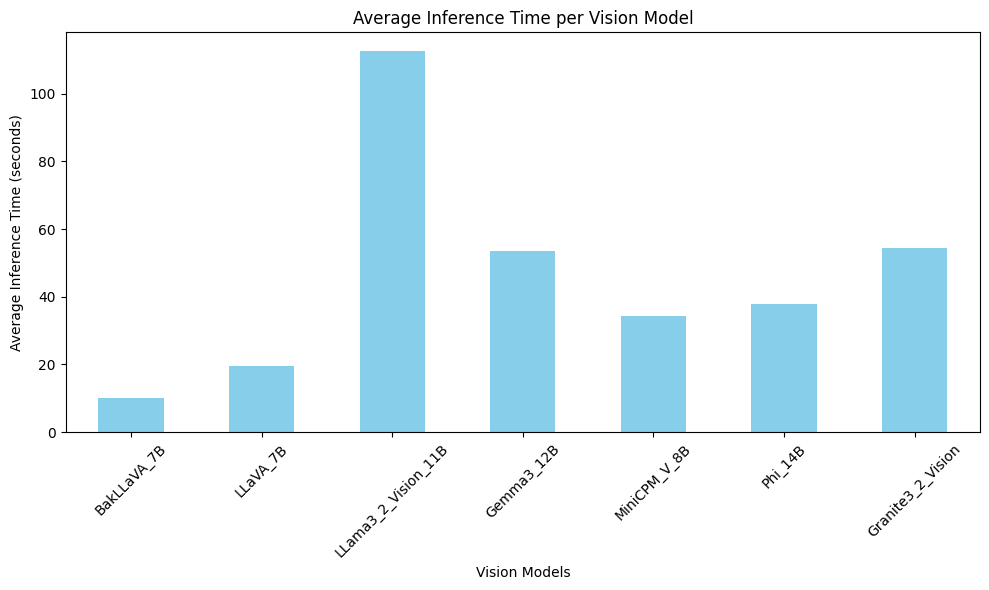

In [10]:
import matplotlib.pyplot as plt

# Extract the relevant columns for vision models
vision_model_columns = [
    'BakLLaVA_7B', 'LLaVA_7B', 'LLama3_2_Vision_11B', 'Gemma3_12B', 
    'MiniCPM_V_8B', 'Phi_14B', 'Granite3_2_Vision'
]

# Calculate the average inference time for each vision model
average_times = df[vision_model_columns].mean()

# Plotting the results
plt.figure(figsize=(10, 6))
average_times.plot(kind='bar', color='skyblue')
plt.title('Average Inference Time per Vision Model')
plt.xlabel('Vision Models')
plt.ylabel('Average Inference Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Average inference time per reasoning model across all vision models

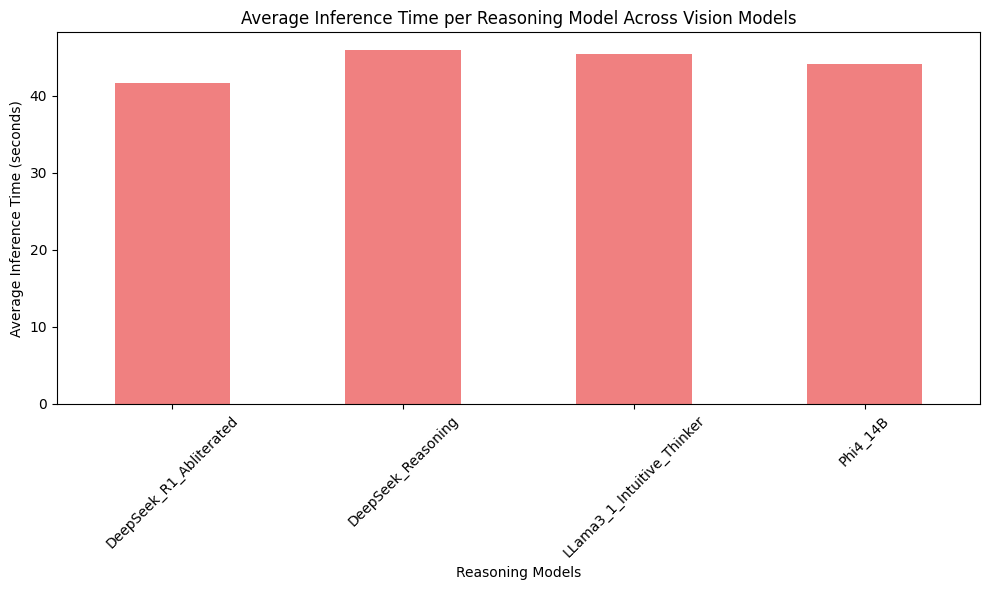

In [15]:
# Remove the columns related to Granite3_2_Vision from the list
reasoning_model_columns_all_filtered = [
    'Reasoning_DeepSeek_Reasoning_Gemma3_12B', 'Reasoning_DeepSeek_Reasoning_LLaVA_7B', 
    'Reasoning_DeepSeek_Reasoning_LLama3_2_Vision_11B', 'Reasoning_DeepSeek_Reasoning_MiniCPM_V_8B',
    'Reasoning_DeepSeek_Reasoning_Phi_14B', 'Reasoning_LLama3_1_Intuitive_Thinker_Gemma3_12B', 
    'Reasoning_LLama3_1_Intuitive_Thinker_LLaVA_7B', 'Reasoning_LLama3_1_Intuitive_Thinker_LLama3_2_Vision_11B', 
    'Reasoning_LLama3_1_Intuitive_Thinker_MiniCPM_V_8B', 'Reasoning_LLama3_1_Intuitive_Thinker_Phi_14B', 
    'Reasoning_DeepSeek_R1_Abliterated_Gemma3_12B', 'Reasoning_DeepSeek_R1_Abliterated_LLaVA_7B', 
    'Reasoning_DeepSeek_R1_Abliterated_LLama3_2_Vision_11B', 'Reasoning_DeepSeek_R1_Abliterated_MiniCPM_V_8B', 
    'Reasoning_DeepSeek_R1_Abliterated_Phi_14B', 'Reasoning_Phi4_14B_Gemma3_12B', 
    'Reasoning_Phi4_14B_LLaVA_7B', 'Reasoning_Phi4_14B_LLama3_2_Vision_11B', 'Reasoning_Phi4_14B_MiniCPM_V_8B', 
    'Reasoning_Phi4_14B_Phi_14B'
]

# Calculate the average inference time for each reasoning model across all vision models
average_reasoning_times_all_filtered = df[reasoning_model_columns_all_filtered].mean()

# Create a mapping for display
average_reasoning_times_all_filtered.index = [
    'DeepSeek_Reasoning', 'LLama3_1_Intuitive_Thinker', 'DeepSeek_R1_Abliterated', 'Phi4_14B'
    ] * 5  # Repeat each reasoning model for the 5 vision models

# Group by reasoning model names
average_reasoning_times_all_filtered = average_reasoning_times_all_filtered.groupby(average_reasoning_times_all_filtered.index).mean()

# Plotting the results
plt.figure(figsize=(10, 6))
average_reasoning_times_all_filtered.plot(kind='bar', color='lightcoral')
plt.title('Average Inference Time per Reasoning Model Across Vision Models')
plt.xlabel('Reasoning Models')
plt.ylabel('Average Inference Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Average inference time for each reasoning model per vision model

In [17]:
reasoning_vision_models = [
        'LLaVA_7B',
        'LLama3_2_Vision_11B',
        'Gemma3_12B',
        'MiniCPM_V_8B',
        'Phi_14B'
    ]

# Define reasoning approaches
reasoning_approaches = [
        "DeepSeek_R1_Abliterated",
        "DeepSeek_Reasoning",
        "LLama3_1_Intuitive_Thinker",
        "Phi4_14B"
    ]
    

In [23]:
def process_data(csv_path):
        
    # Define the vision models we're interested in
    reasoning_vision_models = [
        'LLaVA_7B',
        'LLama3_2_Vision_11B',
        'Gemma3_12B',
        'MiniCPM_V_8B',
        'Phi_14B'
    ]
    
    # Define reasoning approaches
    reasoning_approaches = [
        "DeepSeek_R1_Abliterated",
        "DeepSeek_Reasoning",
        "LLama3_1_Intuitive_Thinker",
        "Phi4_14B"
    ]
    
    # Initialize a dictionary to store results
    results = {}
    
    # For each vision model
    for vision_model in reasoning_vision_models:
        results[vision_model] = {}
        
        # For each reasoning approach
        for approach in reasoning_approaches:
            # Find columns that match this vision model and reasoning approach
            matching_columns = [col for col in df.columns if 
                               col.startswith(f"Reasoning_{approach}") and 
                               vision_model in col]
            
            if matching_columns:
                # Calculate average inference time
                avg_time = df[matching_columns].mean().mean()
                results[vision_model][approach] = avg_time
            else:
                results[vision_model][approach] = 0
    
    # Convert results to DataFrame for easier plotting
    result_df = pd.DataFrame(results).T
    
    return result_df


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Function to create grouped bar plots
def create_grouped_bar_plot(data_df):
    # Set figure size
    plt.figure(figsize=(14, 8))
    
    # Get x positions and width
    num_vision_models = len(data_df.index)
    num_reasoning_approaches = len(data_df.columns)
    
    # Calculate bar width and positions
    bar_width = 0.8 / num_reasoning_approaches
    
    # Create positions for each group
    x = np.arange(num_vision_models)
    
    # Color mapping
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    
    # Create grouped bars
    for i, approach in enumerate(data_df.columns):
        # Calculate position for this set of bars
        pos = x - 0.4 + (i + 0.5) * bar_width
        
        # Create bars
        bars = plt.bar(pos, data_df[approach], 
                      width=bar_width, 
                      label=approach, 
                      color=colors[i % len(colors)])
        
        # Add values on top of bars
        for j, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2., 
                     height + 0.5, 
                     f'{height:.1f}',
                     ha='center', 
                     va='bottom', 
                     fontsize=8,
                     rotation=0)
    
    # Add vision model names on x-axis
    plt.xticks(x, data_df.index, rotation=45, ha='right')
    
    # Add labels and title
    plt.xlabel('Vision Models', fontsize=14)
    plt.ylabel('Average Inference Time (seconds)', fontsize=14)
    plt.title('Average Inference Time for Each Reasoning Model per Vision Model', fontsize=16)
    
    # Add legend
    plt.legend(title='Reasoning Approaches', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout to make room for legend
    plt.tight_layout()
    
    # Add a grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Format y-axis to show seconds
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f s'))
    
    return plt

In [26]:
processed_data = process_data(df)

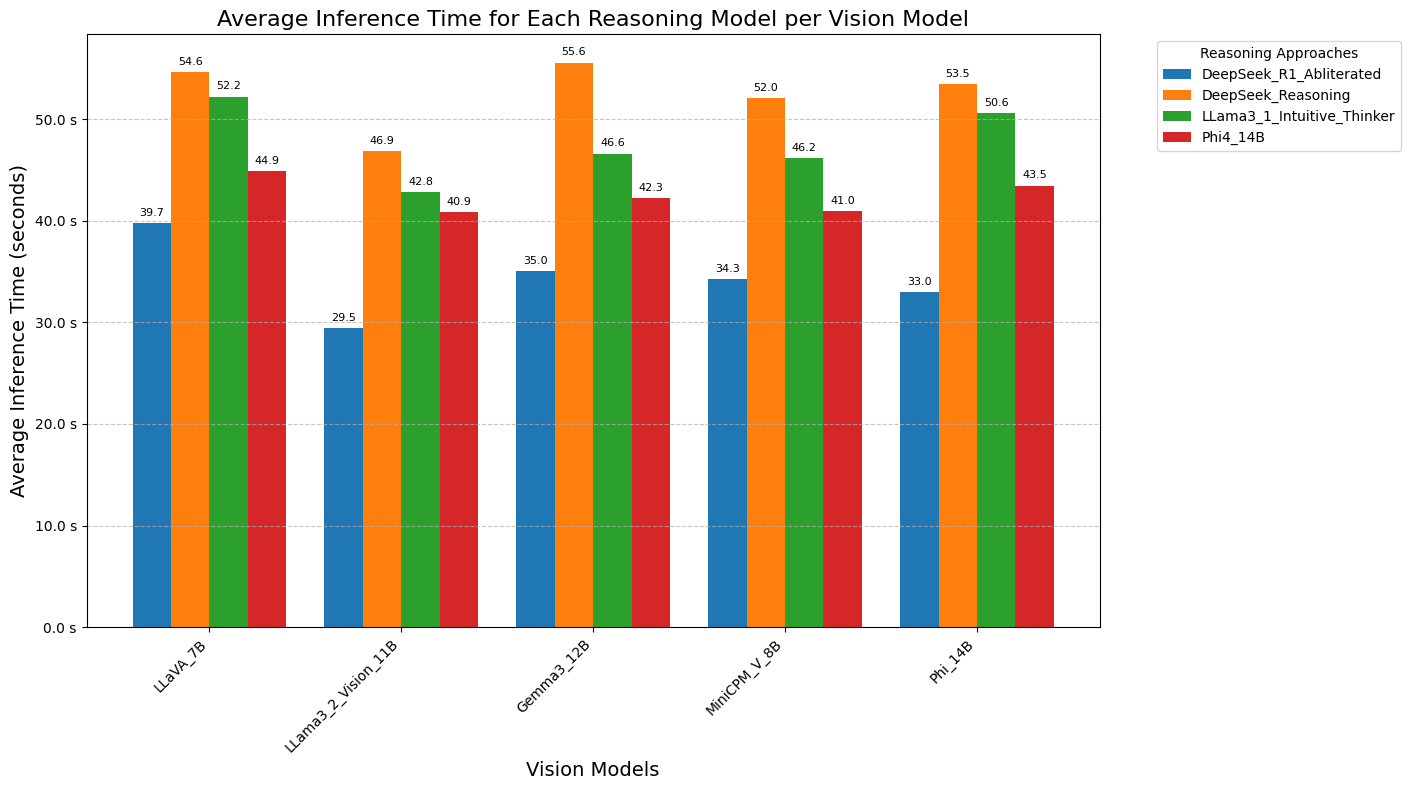

In [28]:
# Create and show the plot
plt = create_grouped_bar_plot(processed_data)
    